<html>
<p style="color:purple;font-size:250%;">
    <b>Rental Bike Prediction</b></p>


Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.
It is important to make the rental bike available and accessible to the public at the right time as 
it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes 
a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply 
of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), 
the number of bikes rented per hour and date information.


Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
        Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)
 

<html>
<p style="color:purple;font-size:150%;">
    <b>Importing libraries</b></p>

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<html>
<p style="color:purple;font-size:150%;">
    <b>Importing Dataset</b></p>

In [165]:
data=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

<html>
<p style="color:purple;font-size:150%;">
    <b>Dataset View</b></p>

In [166]:
data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01-12-2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01-12-2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01-12-2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01-12-2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01-12-2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


<html>
<p style="color:purple;font-size:150%;">
    <b>Dataset Information</b></p>

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<html>
<p style="color:purple;font-size:150%;">
    <b>Summary Statistics</b></p>

In [168]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


<html>
<p style="color:purple;font-size:150%;">
    <b>Checking For Missing Values</b></p>

In [169]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<html>
<p style="color:purple;font-size:150%;">
    <b>Missing Value Plot</b></p>

In [170]:
import missingno as msno

<AxesSubplot:>

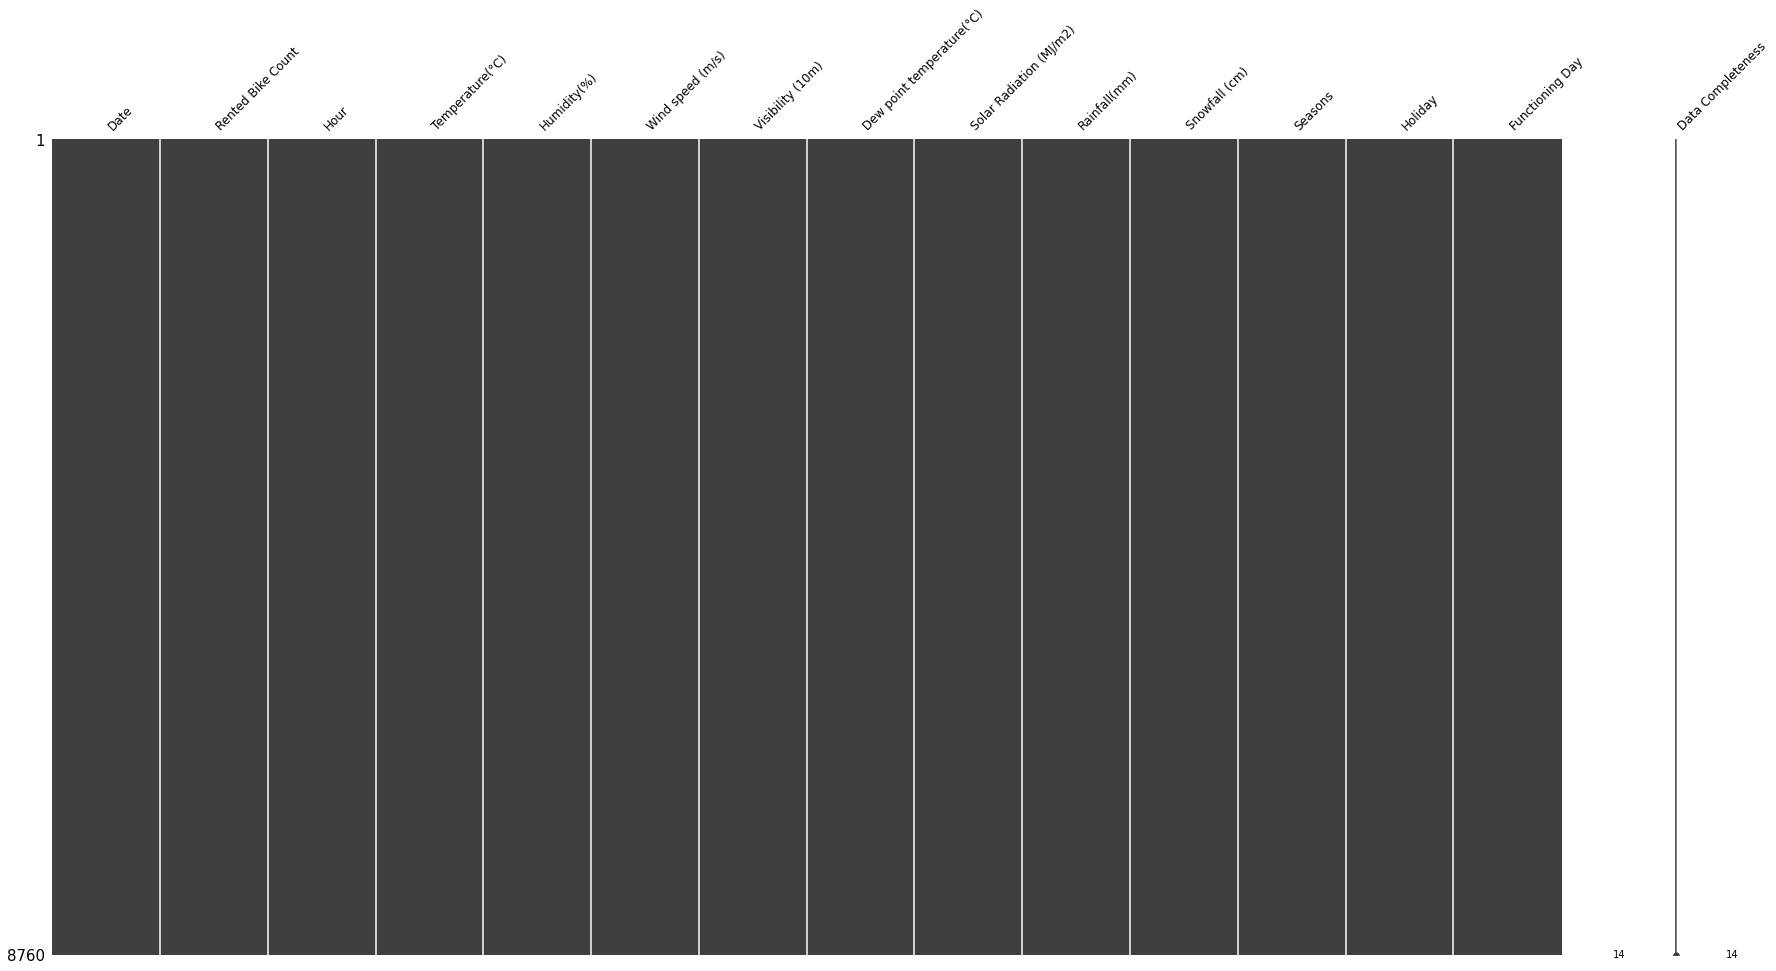

In [171]:
msno.matrix(data,labels=[data.columns],figsize=(30,15),fontsize=12)

<html>
<p style="color:purple;font-size:150%;">
    <b>Checking for Duplicates</b></p>

In [172]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

<html>
<p style="color:purple;font-size:150%;">
    <b>Categorical Variable to Numerical(One Hot Encoding)</b></p>

In [173]:
df=pd.get_dummies(data,columns=['Holiday','Functioning Day','Hour'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday_No Holiday         8760 non-null   uint8  
 12  Functioning Day_Yes        8760 non-null   uint8  
 13  Hour_1                     8760 non-null   uint8

<html>
<p style="color:purple;font-size:150%;">
    <b>Renaming Column Names</b></p>

In [245]:
df=df.rename(columns={'Holiday_No Holiday':'Holiday','Functioning Day_Yes':'Functioning_day'})

<html>
<p style="color:purple;font-size:150%;">
    <b>Deleting The Date Column</b></p>

In [175]:
del df['Date']

<html>
<p style="color:purple;font-size:150%;">
    <b>Correlation</b></p>

In [176]:
df.select_dtypes(include=['float']).corr()

,Temperature(°C),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Temperature(°C),1.000000,-0.036252,0.912798,0.353505,0.050282,-0.218405
Wind speed (m/s),-0.036252,1.000000,-0.176486,0.332274,-0.019674,-0.003554
Dew point temperature(°C),0.912798,-0.176486,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.353505,0.332274,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),0.050282,-0.019674,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.218405,-0.003554,-0.150887,-0.072301,0.008500,1.000000


<html>
<p style="color:purple;font-size:150%;">
    <b>Correlation Plot</b></p>

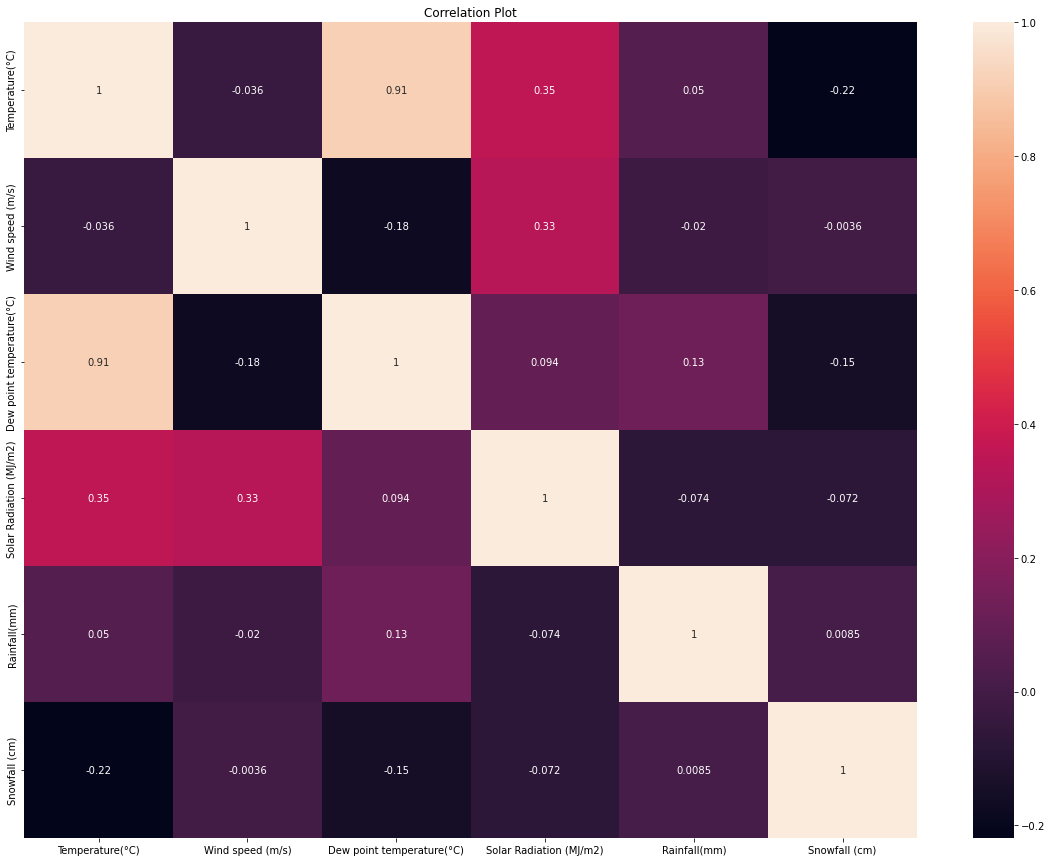

In [177]:
plt.figure(figsize=(20,15))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True)
plt.title('Correlation Plot')
plt.show()

<html>
<p style="color:purple;font-size:200%;">
    <b>Outlier Detection</b></p>

<html>
<p style="color:purple;font-size:150%;">
    <b>Distribution plot</b></p>

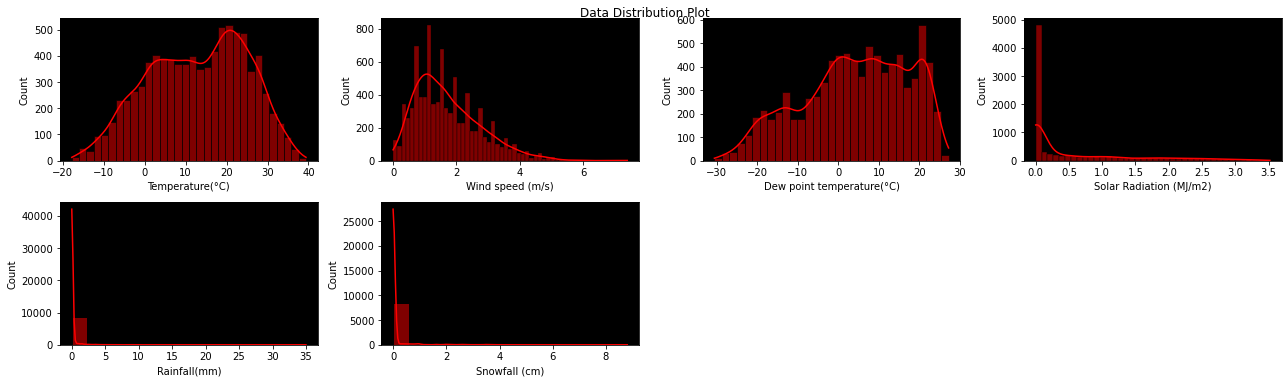

In [178]:
plt.figure(figsize=(18,18))
for i ,col in enumerate (df.select_dtypes(include=['float']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(7,4,i+1)
    sns.histplot(data=df,x=col,ax=ax,color='red',kde=True)
plt.suptitle('Data Distribution Plot')
plt.tight_layout()

<html>
<p style="color:purple;font-size:150%;">
    <b>Box-plot</b></p>

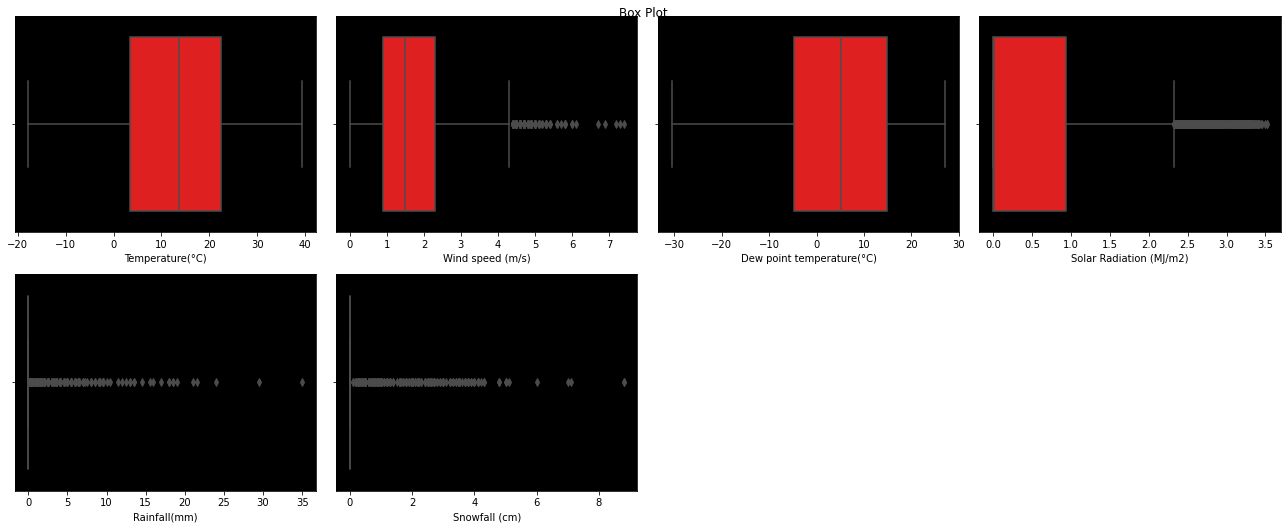

In [179]:
plt.figure(figsize=(18,18))
for i ,col in enumerate (df.select_dtypes(include=['float']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(5,4,i+1)
    sns.boxplot(data=df,x=col,ax=ax,color='red')
plt.suptitle('Box Plot')
plt.tight_layout()

<html>
<p style="color:purple;font-size:150%;">
    <b>Bar-Plot For categorical variables </b></p>

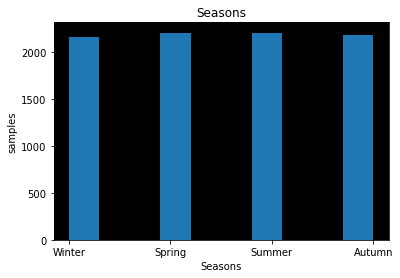

In [180]:
plt.hist(df.Seasons)
plt.title('Seasons')
plt.xlabel('Seasons')
plt.ylabel('samples')
plt.show()

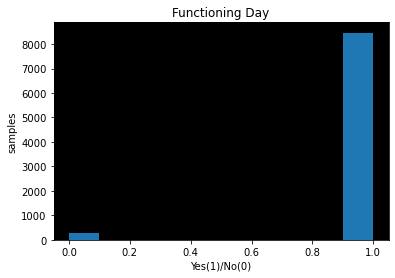

In [181]:
plt.hist(df.Functioning_day )
plt.title('Functioning Day')
plt.xlabel('Yes(1)/No(0)')
plt.ylabel('samples')
plt.show()

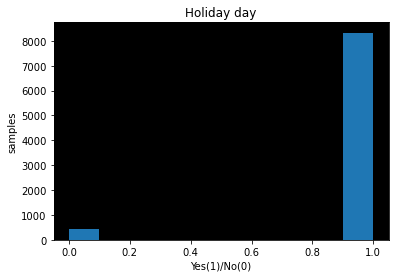

In [182]:
plt.hist(df.Holiday)
plt.title('Holiday day')
plt.xlabel('Yes(1)/No(0)')
plt.ylabel('samples')
plt.show()

<html>
<p style="color:purple;font-size:150%;">
    <b>Dividing the data into Independent and dependent variable</b></p>

In [246]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [184]:
X

array([[-5.2, 37, 2.2, ..., 0, 0, 0],
       [-5.5, 38, 0.8, ..., 0, 0, 0],
       [-6.0, 39, 1.0, ..., 0, 0, 0],
       ...,
       [2.6, 39, 0.3, ..., 1, 0, 0],
       [2.1, 41, 1.0, ..., 0, 1, 0],
       [1.9, 43, 1.3, ..., 0, 0, 1]], dtype=object)

<html>
<p style="color:purple;font-size:150%;">
    <b>Checking for  Multicollinearity(VIF FACTORS)</b></p>

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [186]:
var=df.select_dtypes(include=['float']).columns
VIF=calc_vif(df[var])
VIF

,variables,VIF
0,Temperature(°C),12.694897
1,Wind speed (m/s),3.464617
2,Dew point temperature(°C),7.319015
3,Solar Radiation (MJ/m2),2.209048
4,Rainfall(mm),1.047192
5,Snowfall (cm),1.043320


### Since the VIF of 'Temperature' is more than 10 so it will cause multicollinearity issue so we will drop Temperature column.

In [187]:
X1=df.iloc[:,2:].values
X1

array([[37, 2.2, 2000, ..., 0, 0, 0],
       [38, 0.8, 2000, ..., 0, 0, 0],
       [39, 1.0, 2000, ..., 0, 0, 0],
       ...,
       [39, 0.3, 1968, ..., 1, 0, 0],
       [41, 1.0, 1859, ..., 0, 1, 0],
       [43, 1.3, 1909, ..., 0, 0, 1]], dtype=object)

<html>
<p style="color:purple;font-size:150%;">
    <b>Splitting our dataset into train and test set</b></p>

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0,stratify=X1[:,7])

In [190]:
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [191]:
y_train

array([[   0],
       [1165],
       [1407],
       ...,
       [ 867],
       [ 426],
       [2281]], dtype=int64)

In [192]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7])],remainder='passthrough')
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [193]:
from sklearn.preprocessing import PowerTransformer

In [194]:
sc_X=PowerTransformer(method = 'yeo-johnson')
sc_Y=PowerTransformer(method = 'yeo-johnson')

In [195]:
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [196]:
y_train=sc_Y.fit_transform(y_train)
y_test=sc_Y.transform(y_test)

<html>
<p style="color:purple;font-size:250%;">
    <b>Modeling</b></p>

<html>
<p style="color:purple;font-size:200%;">
    <b>1.Linear Regression</b></p>

In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
model1=LinearRegression()

In [199]:
model1.fit(X_train,y_train)

LinearRegression()

In [200]:
from sklearn.metrics import r2_score

In [201]:
y_pred1=model1.predict(X_test)

In [202]:
rscore1=r2_score(y_test,y_pred1)

In [203]:
rscore1

0.8004702132834891

<html>
<p style="color:purple;font-size:120%;">
    <b> Model Fitting and Summary </b></p>

In [204]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              762.9
Date:                Sun, 28 Aug 2022   Prob (F-statistic):                        0.00
Time:                        11:39:22   Log-Likelihood:                         -3979.3
No. Observations:                6570   AIC:                                      8029.
Df Residuals:                    6535   BIC:                                      8266.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6.453e+11   9.83e+11     -0.656      0.512   -2.57e+12    1.28e+12
x2         -6.477e+11   9.87e+11     -0.656      0.512   -2.58e+12    1.29e+12
x3         -6.477e+11   9.87e+11     -0.656      0.512   -2.58e+12    1.29e+12
x4         -6.429e+11   9.79e+11     -0.656      0.512   -2.56e+12    1.28e+12
x5            -0.2629      0.012    -22.620      0.000      -0.286      -0.240
x6            -0.0169      0.006     -2.601      0.009      -0.030      -0.004
x7             0.0015      0.007      0.208      0.835      -0.012       0.015
x8             0.3775      0.015     25.955      0.000       0.349       0.406
x9             0.2517      0.016     15.614      0.000       0.220       0.283
x10           -0.2567      0.006    -41.655      0.000      -0.269      -0.245
x11            0.0023      0.006      0.379      0.704      -0.010       0.014
x12            0.0419      0.006      7.547      0.000       0.031       0.053
x13            0.4745      0.006     82.696      0.000       0.463       0.486
x14           -0.0365      0.008     -4.745      0.000      -0.052      -0.021
x15           -0.0820      0.008    -10.537      0.000      -0.097      -0.067
x16           -0.1173      0.008    -15.397      0.000      -0.132      -0.102
x17           -0.1747      0.008    -22.681      0.000      -0.190      -0.160
x18           -0.1659      0.008    -21.687      0.000      -0.181      -0.151
x19           -0.0751      0.008     -9.837      0.000      -0.090      -0.060
x20           -0.0098      0.008     -1.225      0.220      -0.025       0.006
x21            0.0647      0.008      7.794      0.000       0.048       0.081
x22           -0.0487      0.009     -5.351      0.000      -0.067      -0.031
x23           -0.1215      0.010    -12.482      0.000      -0.141      -0.102
x24           -0.1163      0.010    -11.786      0.000      -0.136      -0.097
x25           -0.0997      0.010    -10.108      0.000      -0.119      -0.080
x26           -0.1021      0.010     -9.926      0.000      -0.122      -0.082
x27           -0.0978      0.010     -9.659      0.000      -0.118      -0.078
x28           -0.0742      0.010     -7.586      0.000      -0.093      -0.055
x29           -0.0467      0.009     -4.936      0.000      -0.065      -0.028
x30            0.0175      0.009      1.951      0.051   -8.06e-05       0.035
x31            0.1138      0.008     13.675      0.000       0.097       0.130
x32            0.0916      0.008     11.784      0.000       0.076       0.107
x33            0.0932      0.008     11.909      0.000       0.078       0.109
x34            0.1000      0.008     12.926      0.000       0.085       0.115
x35            0.0776      0.008      9.872      0.000       

<html>
<p style="color:purple;font-size:250%;">
    <b>Assumptions Of linear Regression</b></p>

<html>
<p style="color:purple;font-size:150%;">
    <b>1.Checking for normality of the residuals</b></p>

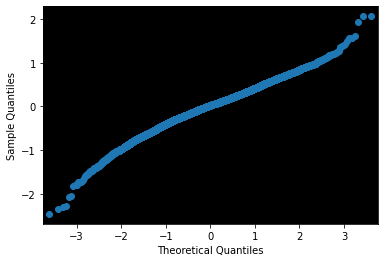

In [205]:
residuals=lin_reg.resid
sm.qqplot(residuals)
plt.show()

<html>
<p style="color:purple;font-size:150%;">
    <b>2.Checking for homoscedasticity</b></p>

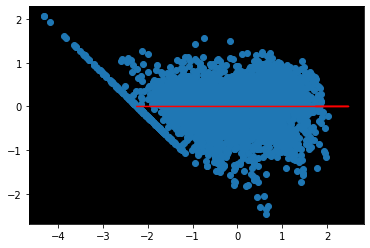

In [206]:
plt.scatter(lin_reg.predict(X_train),residuals)
plt.plot(y_train,[0]*len(y_train),c='r')

<html>
<p style="color:purple;font-size:200%;">
    <b>Decision Tree Regression</b></p>

In [207]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [208]:
y_pred2=model2.predict(X_test)

In [209]:
rscore2=r2_score(y_test,y_pred2)

In [210]:
rscore2

0.8007096766095139

<html>
<p style="color:purple;font-size:200%;">
    <b>Random Forest Regression</b></p>

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
model3=RandomForestRegressor(n_estimators=10,random_state=0)
model3.fit(X_train,y_train)

C:\Users\shash\AppData\Local\Temp\ipykernel_11616\3741388281.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [234]:
y_pred3=model3.predict(X_test)

In [235]:
rscore3=r2_score(y_test,y_pred3)

In [236]:
rscore3

0.8877029077018322

<html>
<p style="color:purple;font-size:200%;">
    <b>Bagging Regressor</b></p>

In [237]:
from sklearn.ensemble import BaggingRegressor
model4= BaggingRegressor(model3,random_state=0)
model4.fit(X_train, y_train)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=10,
                                                      random_state=0),
                 random_state=0)

In [238]:
y_pred4=model4.predict(X_test)

In [239]:
rscore4=r2_score(y_test,y_pred4)

In [240]:
rscore4

0.8999151577475398

<html>
<p style="color:purple;font-size:200%;">
    <b>Accuracy Table</b></p>

In [241]:
data1={'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Bagging Regressor'],'R_Score':[rscore1,rscore2,rscore3,rscore4]}

In [242]:
Accuracy_Table=pd.DataFrame(data1)

In [243]:
Accuracy_Table['Rank']=Accuracy_Table['R_Score'].rank(axis=0,ascending=False)

In [244]:
Accuracy_Table

,Model,R_Score,Rank
0,Linear Regression,0.800470,4.0
1,Decision Tree Regressor,0.800710,3.0
2,Random Forest Regressor,0.887703,2.0
3,Bagging Regressor,0.899915,1.0
